In [28]:
import pygplates
import pandas as pd
import sys
sys.path.append('/Users/Simon/GIT/PlateTectonicTools/')
#import ptt.subduction_convergence as sc
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from reconstruction_classes import *
from raster_reconstruction_classes import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.0.0.16


In [29]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


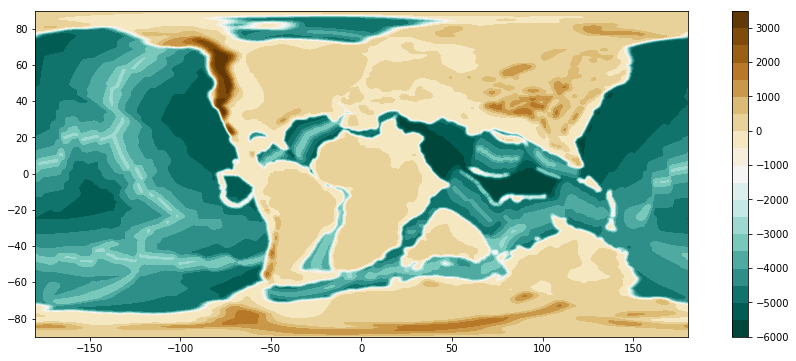

In [30]:
ptopo = GplatesRaster('/Users/Simon/cloudstor/Shared/Paleotopography_Grids/paleotopobathy_smooth_110.00Ma.nc')

ptopo.plot()


In [31]:
result = ptopo.sample([150.1,51.1],[50.1,50.1])

print result


[-5462.96678217   239.48097015]


Profile crosses: 
1 subduction zones 
1 Mid-ocean ridges 
0 other boundaries


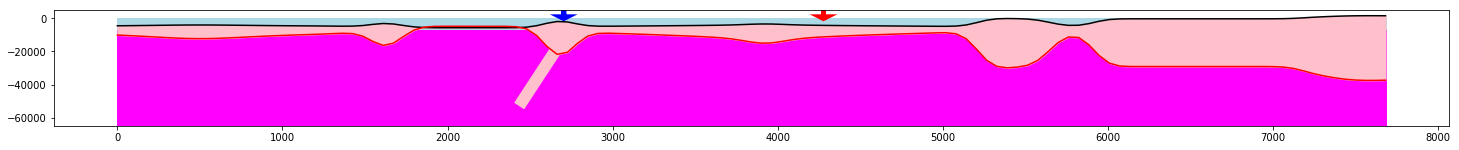

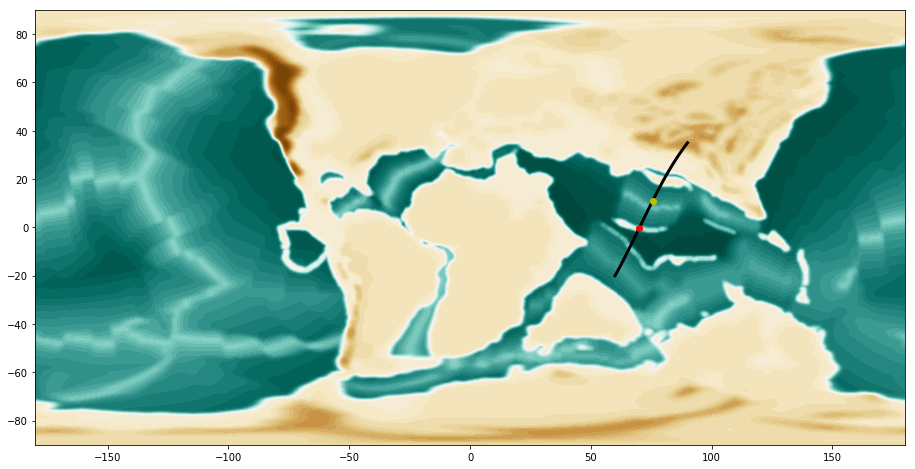

In [49]:
M2016_110Ma = M2016.plate_snapshot(110.)

cs = ptopo.cross_section([60,90],[-20,35])

cs.plate_boundary_intersections(M2016_110Ma.resolved_topological_sections)

print 'Profile crosses: \n%d subduction zones \n%d Mid-ocean ridges \n%d other boundaries' \
    % (len(cs.subduction_intersections), 
       len(cs.ridge_intersections), 
       len(cs.other_intersections))

# Get Moho from topography assuming isostasy
moho_profile = pg.topo2moho(cs.grid_values,ref_depth=30000)

# plot the profile
plt.figure(figsize=(25,3))
pg.paleogeography_cross_section(cs.profileX_kms,cs.grid_values,moho_profile,
                                cs.subduction_intersections,cs.ridge_intersections,
                                vertical_exaggeration=10.)
plt.show()

plt.figure(figsize=(20,8))
plt.contourf(ptopo.gridX, ptopo.gridY, ptopo.gridZ,
             np.arange(-6000,4001,200), cmap=plt.cm.BrBG_r)
plt.gca().set_aspect('equal')
plt.plot(cs.GreatCirclePoints[:,1], cs.GreatCirclePoints[:,0], 'k', linewidth=3)
for point in cs.subduction_intersections:
    plt.plot(point[0].to_lat_lon()[1], point[0].to_lat_lon()[0],'ro')
for point in cs.ridge_intersections:
    plt.plot(point[0].to_lat_lon()[1], point[0].to_lat_lon()[0],'yo')
for point in cs.other_intersections:
    plt.plot(point[0].to_lat_lon()[1], point[0].to_lat_lon()[0],'go')
plt.show()
